<a href="https://colab.research.google.com/github/beantkapoor786/machine-learning-projects/blob/main/mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for data
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import scipy

# for plotting
import matplotlib as mpl
import pylab as plt
%matplotlib inline
import seaborn as sns

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## for explainer
from lime import lime_tabular

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# column names are present in a text file, have to manually put them in the list
col_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
len(col_names)

# read in data
df = pd.read_csv('/content/drive/MyDrive/PhD/Machine learning projects/1 mushroom classification/mushroom/agaricus-lepiota.data', names = col_names)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# print out number of rows and columns
print("Number of rows: %d, Number of columns: %d" % (df.shape[0], df.shape[1]))

Number of rows: 8124, Number of columns: 23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

'Class' is our target variable. We only one variable data type - object. Every column is nominally valued. Therefore, we won't get the descriptive statistis such as mean, median, quantiles etc. Nevertheless, we will get other information such as total count, unique values (number of classes), top class, and the frequency of the top class.

In [ ]:
# let's get a quick description of the data
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Classes vary from 2 to 12 between attributes. Let's also take a look the last five rows of the dataset.

In [ ]:
# last 5 rows
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [ ]:
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

**NO MISSING VALUES**

Since all our attributes are categorical, let's create some code to generate stats for each of them.

In [ ]:
df_stats = pd.DataFrame(columns = ['column', 'values', 'value_count'])

tmp = pd.DataFrame()

for c in df.columns:
  tmp['column'] = [c]
  tmp['values'] = [df[c].unique()]
  tmp['value_count'] = len(list(df[c].unique()))
  df_stats = pd.concat([df_stats, tmp], axis = 0)

df_stats

,column,values,value_count
0,class,"[p, e]",2
0,cap-shape,"[x, b, s, f, k, c]",6
0,cap-surface,"[s, y, f, g]",4
0,cap-color,"[n, y, w, g, e, p, b, u, c, r]",10
0,bruises,"[t, f]",2
0,odor,"[p, a, l, n, f, c, y, s, m]",9
0,gill-attachment,"[f, a]",2
0,gill-spacing,"[c, w]",2
0,gill-size,"[n, b]",2
0,gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]",12


In [ ]:
# let's sort this dataframe by distinct values in each column
df_stats.sort_values(by = 'value_count', inplace = True, ascending = True)

# set the index to column names
df_stats.set_index('column', inplace = True)
df_stats

,values,value_count
column,,
veil-type,[p],1
class,"[p, e]",2
bruises,"[t, f]",2
gill-attachment,"[f, a]",2
gill-spacing,"[c, w]",2
gill-size,"[n, b]",2
stalk-shape,"[e, t]",2
ring-number,"[o, t, n]",3
cap-surface,"[s, y, f, g]",4


Let's familiarize with our dataset. Some quick observations -

1. Column 'viel-type' has only one unique value, therefore it won't bring any value to our model. Remove this variable.
2. In our previous codes, we saw that there are no missing values. However, if we look at this result carefully, the column 'stalk-root' has '?' values. By looking at the README file that came with this dataset, it is a 'missing' value. Let's count these rows. If there are not many rows with ? we can remove them. However, if there are a lot of rows with ? value, it might not be wirth removing because we will lose information present in other columns.
3. Columns bruises, gill-attachment, gill-spacing, gill-size, and stalk-shape have 2 distinct values. We will apply one-hot encoding to these columns.
4. Column ring-number has 3 distinct values - one-hot encoding.
5. Columns cap-surface, veil-color, stalk-surface-above-ring, stalk-surface-below-ring have 4 distinct values - one-hot encoding should work in this case.
6. For columns with distinct values 5 or above, one-hot encoding might be too memory intensive. We will 'label-encode' these for now. If there's room for improvement, we can review this step.





In [ ]:
# remomve column veil-type
df = df.drop('veil-type', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# check number of rows with '?' stalk-root value
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

There are 2,480 rows where **stalk-rot** has **?** values. If we remove these, we will remove 30.53% rows from the dataset. That might not be a really smart move here so we will keep it as it is.

<Axes: xlabel='stalk-root', ylabel='count'>

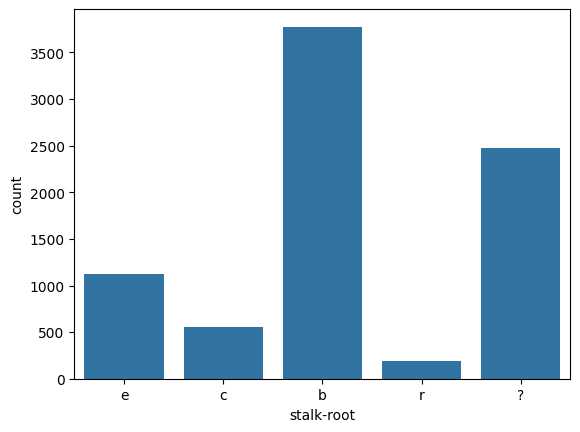

In [ ]:
# let's create bar plots for the frequency of each value in each column
sns.countplot(data = df, x = 'stalk-root')

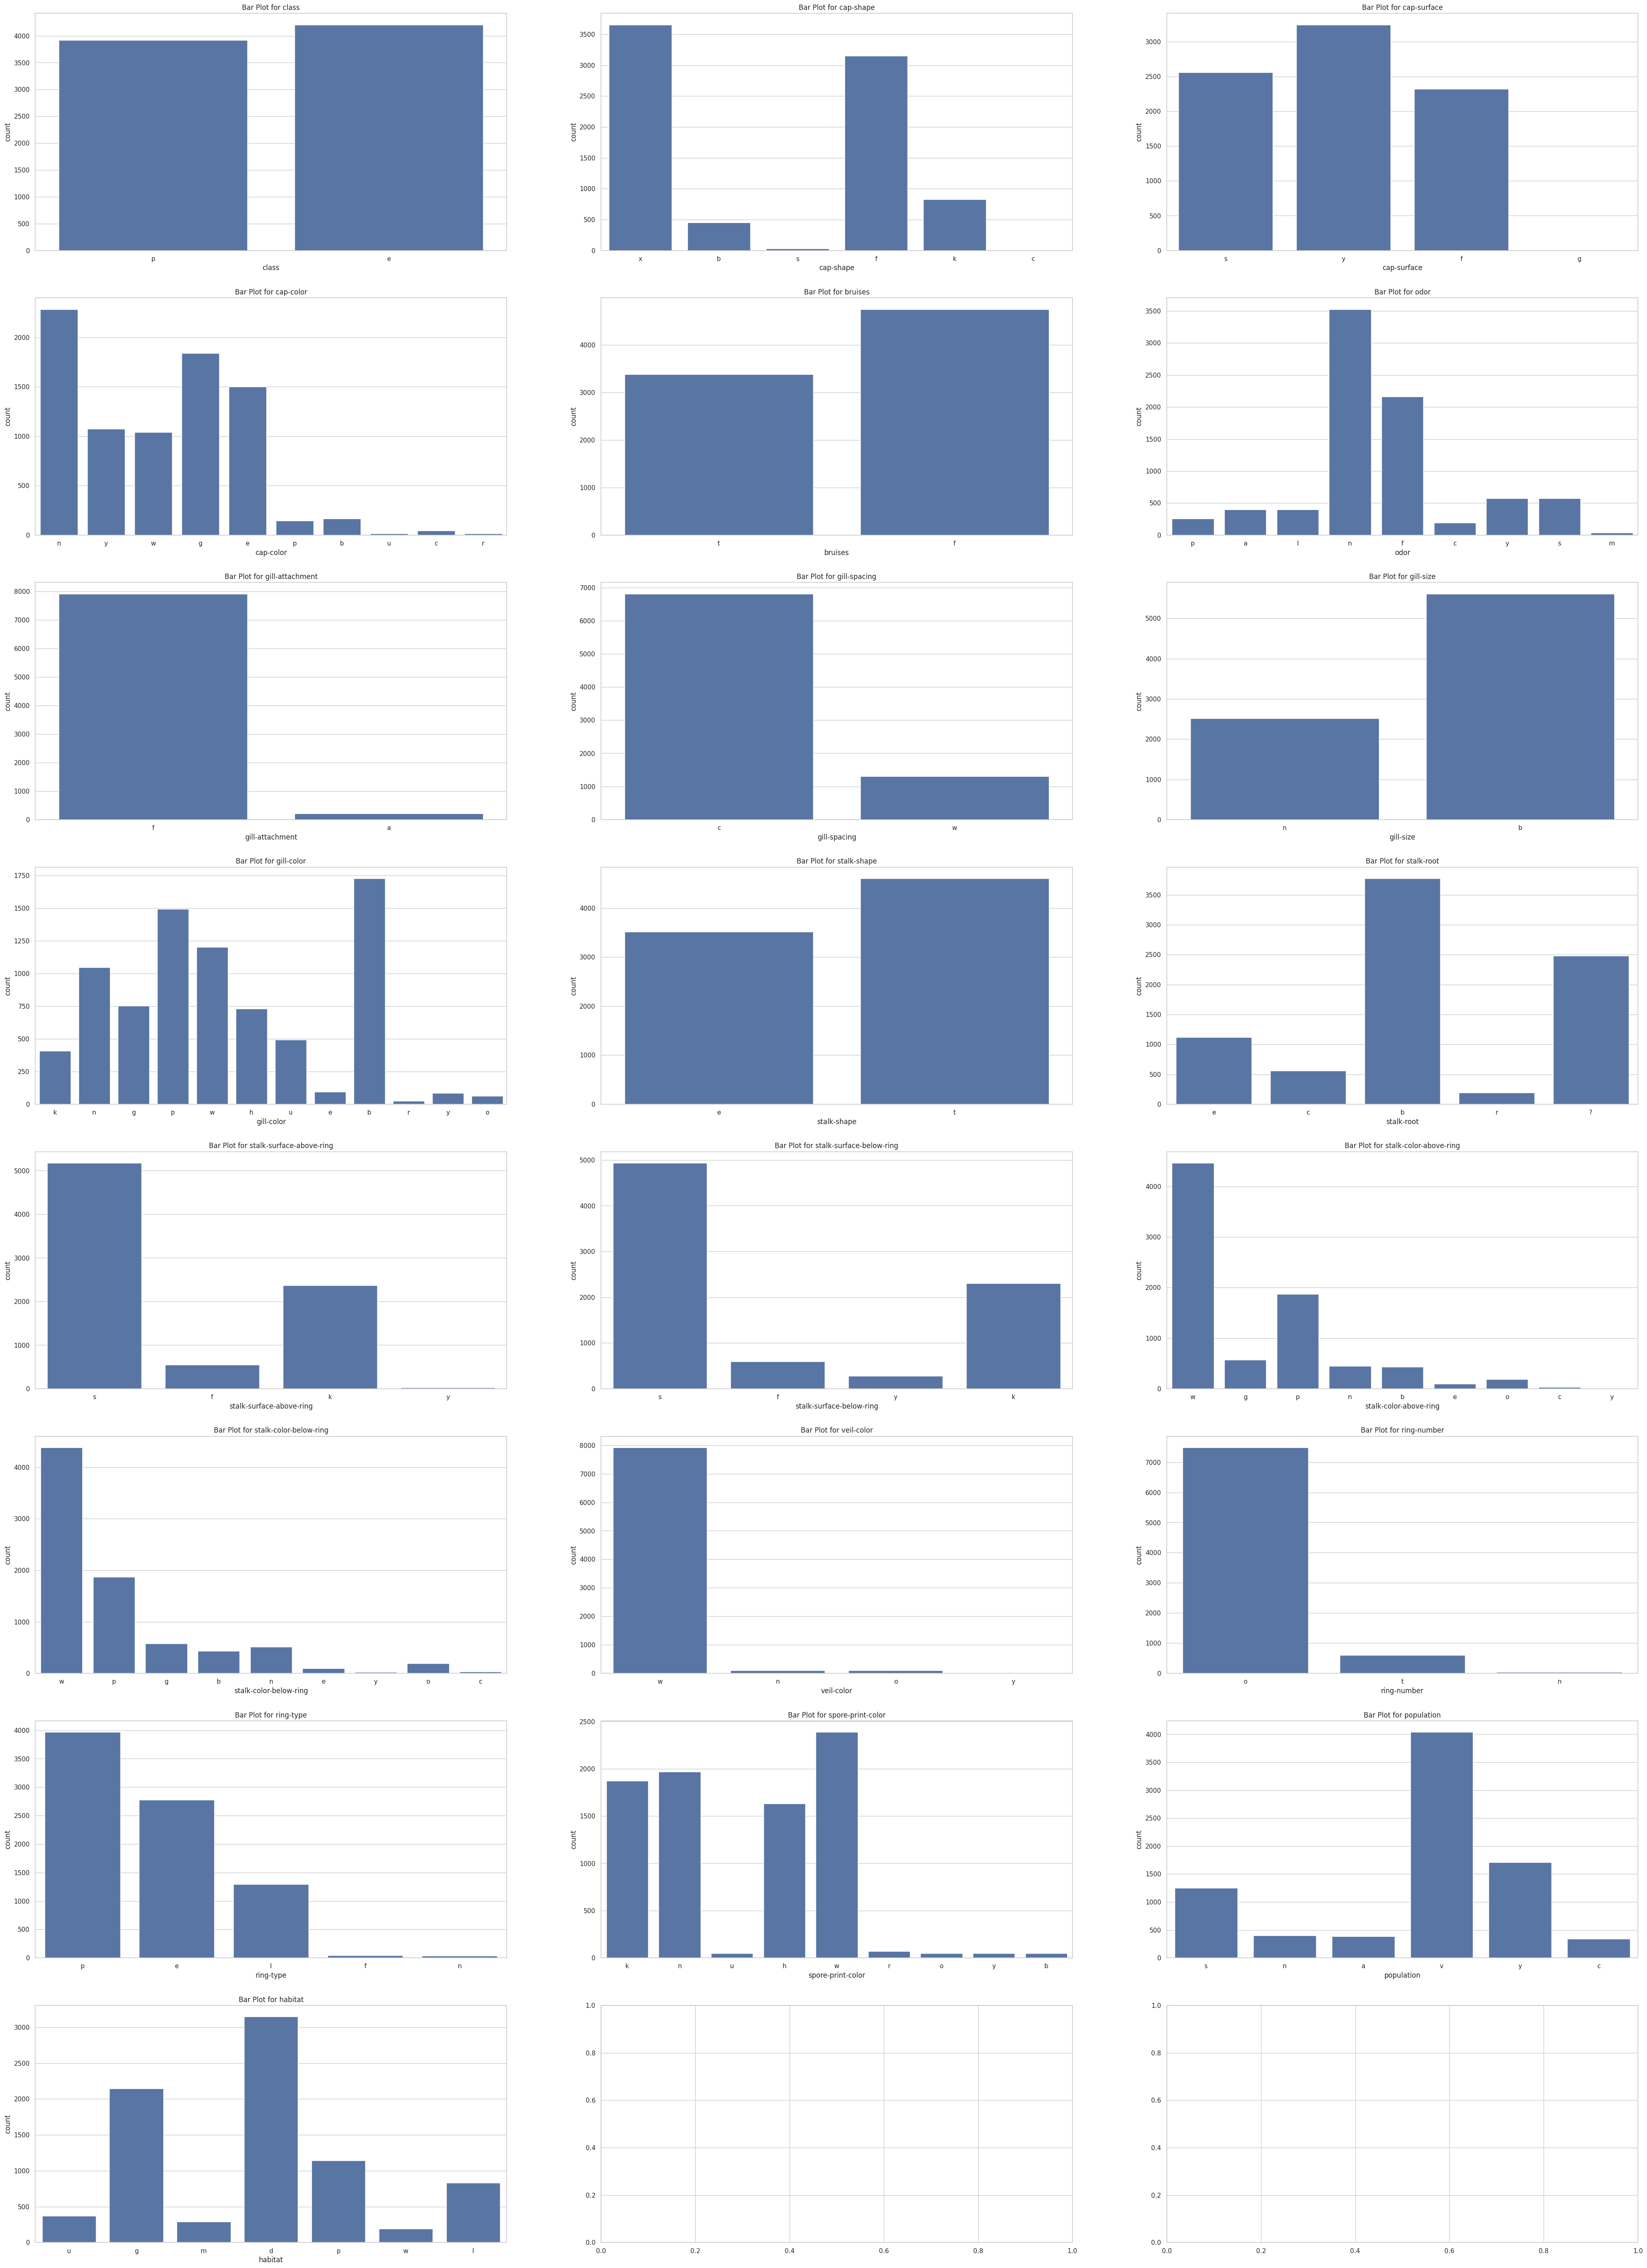

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(50, 70))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Bar Plot for {column}')

# Adjust layout
plt.show()

**Observations**


1.   Most of the variables are heavily skewed e.g. cap-shape, cap-color, odor, gill-attachement etc. which might affect the performance of our model
2.   Binary variables such as bruises and stalk-shape have slightly close to 50-50 distribution of the values.

For now, are done with the EDA of this dataset. Let's start preparing it for classification algorithms. We will create multiple models and assess their performance.



## MODEL - ALL VARIABLES - ONE-HOT ENCODING - XGBOOST



In [ ]:
# split data
df_train, df_test = model_selection.train_test_split(df, test_size = 0.3)

In [ ]:
## print info
print("X_train shape:", df_train.drop("class",axis=1).shape, "| X_test shape:", df_test.drop("class",axis=1).shape)
print(df_train.shape[1], "features:", df_train.drop("class",axis=1).columns.to_list())

X_train shape: (5686, 21) | X_test shape: (2438, 21)
22 features: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


e    4208
p    3916
Name: class, dtype: int64

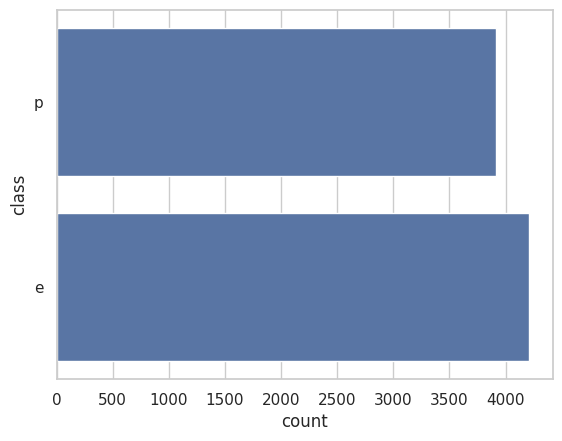

In [ ]:
# before proceeding let's plot the target variable
y = df['class']
sns.countplot(y)
y.value_counts()

51.8% of the labels are 'edible' and 48.2% are 'poisonous'. It's a good thing that our target variable is not heavily skewed to either side. Also, since all our variables are categorical, we would not need to do any scaling. If there were numerical features present, we would have scaled those features if needed.

#### TRAIN DATASET

In [ ]:
# one hot-encoding for all variables on training data (except target variable)
len(df_train.columns)
non_dummy_cols = ['class']
dummy_cols = list(set(df.columns) - set(non_dummy_cols))
dummy_train = pd.get_dummies(df_train, columns = dummy_cols)
dummy_train.columns

Index(['class', 'ring-type_e', 'ring-type_f', 'ring-type_l', 'ring-type_n',
       'ring-type_p', 'stalk-surface-below-ring_f',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y',
       ...
       'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y'],
      dtype='object', length=117)

In [ ]:
# split attributes and target variable
X_train = dummy_train.iloc[:, 1:]
y_train = dummy_train['class']

Finally, it's time to build the machine learning model. There are various types of classification algorithms out there such as Logistic Regression, Random Forest Classifier, K-nearest neighbors etc. We will use XGBoost, a Gradient Boosting Decision Tree (GBDT). A GBDT is a decision tree ensemble learning algorithm similar to random forest, for classification and regression. Ensemble learning algorithms combine multiple machine learning algorithms to obtain a better model.

In [ ]:
# call model
model = ensemble.GradientBoostingClassifier()

# define hyperparameters combination to try
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

In [ ]:
## random search
random_search = model_selection.RandomizedSearchCV(model,
       param_distributions=param_dic, n_iter=10,
       scoring="accuracy", n_jobs = 8).fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

Best Model parameters: {'subsample': 0.8, 'n_estimators': 1250, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 2, 'learning_rate': 0.05}
Best Model mean accuracy: 1.0


RandomizedSearchSV took 2m4s to run with 10 mins and 8 cores on my computer. We have the best model parameters and a model mean accuracy of 1.0. That actually means that we can expect this model to make 100% of the predictions correct on the test set. I am happy that this model is performing almost perfectly on the training data however we can be overfitting too here. Let's try it on test set to see how it performs on the unseen data. First of all, we will have to prepare our test data just like the train data.

In [ ]:
# one hot-encoding for all variables on test data (except target variable)
dummy_test = pd.get_dummies(df_test, columns = dummy_cols)
dummy_test.columns

Index(['class', 'ring-type_e', 'ring-type_f', 'ring-type_l', 'ring-type_n',
       'ring-type_p', 'stalk-surface-below-ring_f',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y',
       ...
       'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y'],
      dtype='object', length=117)

In [ ]:
# split dummy test data
X_test = dummy_test.iloc[:, 1:]
y_test = dummy_test['class']

In [ ]:
# train
model.fit(X_train, y_train)

# test
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)

In [ ]:
predicted_prob

array([1.12249516e-03, 6.53726857e-05, 9.98566273e-01, ...,
       9.99985091e-01, 9.94899662e-05, 1.12179696e-03])

Moment of truth, we will see how our model performs on the test data. I will evaluate the model using these metrics - Accuracy, AUC, Precision and Recall.

In [ ]:
# Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))

recall = metrics.recall_score(y_test, predicted, pos_label = 'e')
precision = metrics.precision_score(y_test, predicted, pos_label = 'e')
print("Recall (all 'e's predicted right):", round(recall,2))
print("Precision (confidence when predicting an 'e'):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 1.0
Auc: 1.0
Recall (all 'e's predicted right): 1.0
Precision (confidence when predicting an 'e'): 1.0
Detail:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1256
           p       1.00      1.00      1.00      1182

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Wow, this means that the acurracy of the model is 100%. It predicted all the labels with 100% precision. Let's also create the confusion matrix.

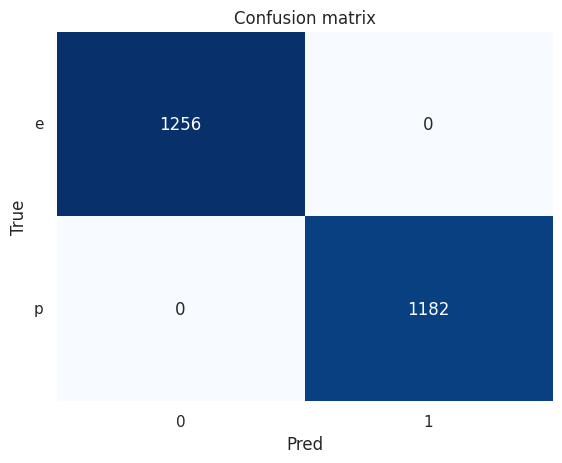

In [ ]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

Again, the model predicted all the 'e's and 'p's correctly. There are no false positives or false negatives.

In [ ]:
print("True:", y_test[7608], "--> Pred:", predicted[2], "| Prob:", np.max(predicted_prob[2]))

True: p --> Pred: p | Prob: 0.9985662726821513


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


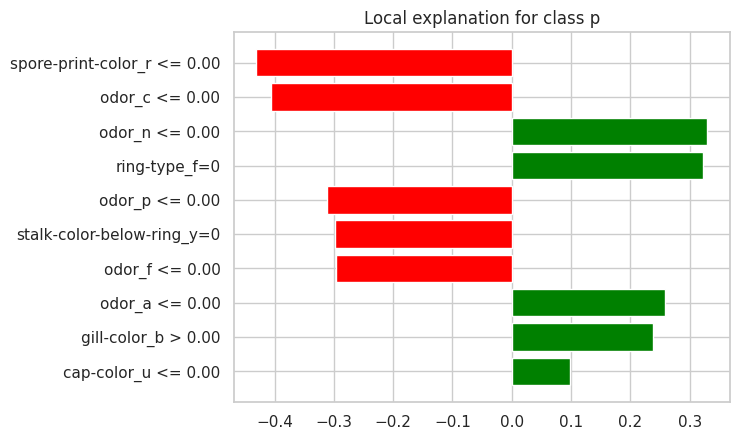

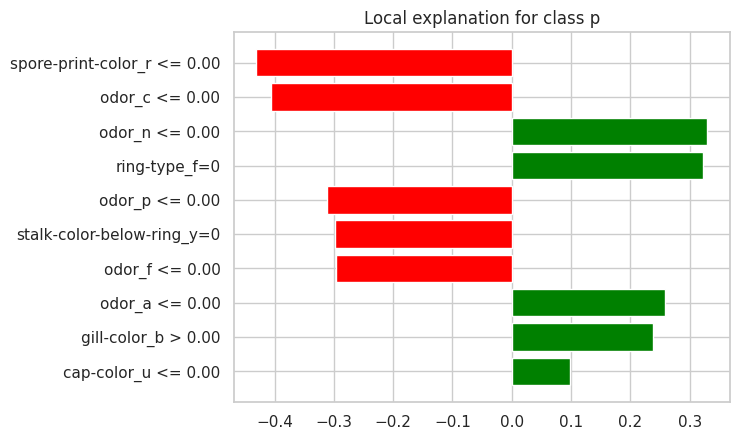

In [ ]:
X_names = X_train.columns
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values[:,:], feature_names=X_names, categorical_features=range(22), class_names=np.unique(y_train), mode="classification")
explained = explainer.explain_instance(X_test.iloc[2, :], model.predict_proba, num_features=10)
explained.as_pyplot_figure()

The three main factors that this particular mushroom is predicted to be poisonous (p) are that this mushroom has green (r) spore print color, has creosote (c) odor, and has a flaring ring type.

**CONCLUSION**:

In this project, I generated a gradient boosting decision tree model predict which mushrooms are edible or poisonous. Raw data was obtained from UCI Machine Learning Repository. All the attributes were categorical therefore I use one-hot encoding. GBDTs iteratively train an ensemble of shallow decision trees, with each iteration using the error residuals of the previous model to fit the next model. There have become a popular choice for classification algorithms. This model was able to achieve 100% accuracy and 100% recall rate which is what we want from our production level models however we still have to be careful and double check every performance metric.